화학공정에서 산출량을 향상하기 위한 실험이 진행되었다.  
4개의 요인이 선택되었고, 완전 랜덤화 실험이 두 번 반복 시행되었다.  

실험 결과:

|처리조합|I|II|처리조합|I|II|
|---|---|---|---|---|---|
|$(1)$|$90$|$93$|$d$|$98$|$95$|
|$a$|$74$|$78$|$ad$|$72$|$76$|
|$b$|$81$|$85$|$bd$|$87$|$83$|
|$ab$|$83$|$80$|$abd$|$85$|$86$|
|$c$|$77$|$78$|$cd$|$99$|$90$|
|$ac$|$81$|$80$|$acd$|$79$|$75$|
|$bc$|$88$|$82$|$bcd$|$87$|$84$|
|$abc$|$73$|$70$|$abcd$|$80$|$80$|

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

temp = pd.DataFrame({
    'Treament': ['(1)', 'a','b','ab','c','ac','bc','abc','d','ad','bd','abd','cd','acd','bcd','abcd'],
})

temp['a'] = temp['Treament'].map(lambda x: 1 if 'a' in x else -1)
temp['b'] = temp['Treament'].map(lambda x: 1 if 'b' in x else -1)
temp['c'] = temp['Treament'].map(lambda x: 1 if 'c' in x else -1)
temp['d'] = temp['Treament'].map(lambda x: 1 if 'd' in x else -1)
temp

,Treament,a,b,c,d
0,(1),-1,-1,-1,-1
1,a,1,-1,-1,-1
2,b,-1,1,-1,-1
3,ab,1,1,-1,-1
4,c,-1,-1,1,-1
5,ac,1,-1,1,-1
6,bc,-1,1,1,-1
7,abc,1,1,1,-1
8,d,-1,-1,-1,1
9,ad,1,-1,-1,1


In [2]:
temp['EX1'] = [90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80]
temp['EX2'] = [93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80]
temp

,Treament,a,b,c,d,EX1,EX2
0,(1),-1,-1,-1,-1,90,93
1,a,1,-1,-1,-1,74,78
2,b,-1,1,-1,-1,81,85
3,ab,1,1,-1,-1,83,80
4,c,-1,-1,1,-1,77,78
5,ac,1,-1,1,-1,81,80
6,bc,-1,1,1,-1,88,82
7,abc,1,1,1,-1,73,70
8,d,-1,-1,-1,1,98,95
9,ad,1,-1,-1,1,72,76


In [3]:
temp[['EX1','EX2']].mean(1)

0     91.5
1     76.0
2     83.0
3     81.5
4     77.5
5     80.5
6     85.0
7     71.5
8     96.5
9     74.0
10    85.0
11    85.5
12    94.5
13    77.0
14    85.5
15    80.0
dtype: float64

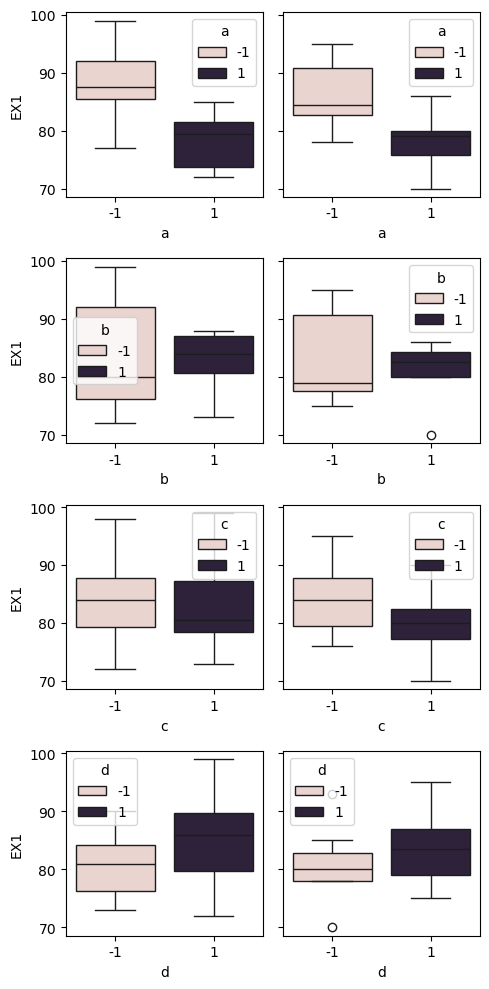

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, sharey=True, figsize=(5, 10))
sns.boxplot(data=temp, x='a', y='EX1', hue='a', ax=ax[0,0])
sns.boxplot(data=temp, x='b', y='EX1', hue='b', ax=ax[1,0])
sns.boxplot(data=temp, x='c', y='EX1', hue='c', ax=ax[2,0])
sns.boxplot(data=temp, x='d', y='EX1', hue='d', ax=ax[3,0])
sns.boxplot(data=temp, x='a', y='EX2', hue='a', ax=ax[0,1])
sns.boxplot(data=temp, x='b', y='EX2', hue='b', ax=ax[1,1])
sns.boxplot(data=temp, x='c', y='EX2', hue='c', ax=ax[2,1])
sns.boxplot(data=temp, x='d', y='EX2', hue='d', ax=ax[3,1])
plt.tight_layout()
plt.show()

# 요인효과를 추정하라

In [5]:
from DOE import effect_est

In [6]:
for fac in temp['Treament']:
    if fac == '(1)':
        continue
    print(f'요인 {fac}의 효과:', effect_est(data=temp, sign_col=[f for f in fac], value_cols=['EX1','EX2']))

요인 a의 효과: -9.0625
요인 b의 효과: -1.3125
요인 ab의 효과: 4.0625
요인 c의 효과: -2.6875
요인 ac의 효과: 0.6875
요인 bc의 효과: -0.5625
요인 abc의 효과: -5.1875
요인 d의 효과: 3.9375
요인 ad의 효과: -2.1875
요인 bd의 효과: -0.1875
요인 abd의 효과: 4.6875
요인 cd의 효과: 1.6875
요인 acd의 효과: -0.9375
요인 bcd의 효과: -0.9375
요인 abcd의 효과: 2.4375


__최소제곱법__

In [7]:
des_mat = temp[['a','b','c','d']]

for fac in temp['Treament']:
    if fac in ['(1)', 'a','b','c','d']:
        continue
    des_mat.loc[:, fac] = temp[[f for f in fac]].prod(1)
des_mat

C:\Users\USER\AppData\Local\Temp\ipykernel_2544\3870138338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_mat.loc[:, fac] = temp[[f for f in fac]].prod(1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2544\3870138338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_mat.loc[:, fac] = temp[[f for f in fac]].prod(1)


,a,b,c,d,ab,ac,bc,abc,ad,bd,abd,cd,acd,bcd,abcd
0,-1,-1,-1,-1,1,1,1,-1,1,1,-1,1,-1,-1,1
1,1,-1,-1,-1,-1,-1,1,1,-1,1,1,1,1,-1,-1
2,-1,1,-1,-1,-1,1,-1,1,1,-1,1,1,-1,1,-1
3,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,1,1
4,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,-1
5,1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1
6,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,1,-1,1
7,1,1,1,-1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1
8,-1,-1,-1,1,1,1,1,-1,-1,-1,1,-1,1,1,-1
9,1,-1,-1,1,-1,-1,1,1,1,-1,-1,-1,-1,1,1


In [8]:
((1/2**3) * des_mat.T @ temp[['EX1','EX2']].mean(1))

a      -9.0625
b      -1.3125
c      -2.6875
d       3.9375
ab      4.0625
ac      0.6875
bc     -0.5625
abc    -5.1875
ad     -2.1875
bd     -0.1875
abd     4.6875
cd      1.6875
acd    -0.9375
bcd    -0.9375
abcd    2.4375
dtype: float64

요인 $a$의 효과가 절대값 기준으로 가장 컸고, 그 다음으로 요인 $abc$, 즉 요인 $a,b,c$의 상호작용에 의한 효과가 컸다. 요인 $d$의 단독 효과도 강했다.

# 분산분석(유의수준 0.01)

In [9]:
import statsmodels.api as sm

df = temp.melt(id_vars=['a','b','c', 'd'], value_vars=['EX1','EX2'], value_name='Y', var_name='Execution')
model = sm.OLS.from_formula(formula='Y ~ a * b * c * d', data=df).fit()
sm.stats.anova_lm(model).round(4)

,df,sum_sq,mean_sq,F,PR(>F)
a,1.0,657.0312,657.0312,85.8163,0.0000
b,1.0,13.7813,13.7813,1.8000,0.1984
a:b,1.0,132.0313,132.0313,17.2449,0.0007
c,1.0,57.7813,57.7813,7.5469,0.0143
a:c,1.0,3.7812,3.7812,0.4939,0.4923
b:c,1.0,2.5312,2.5312,0.3306,0.5733
a:b:c,1.0,215.2812,215.2812,28.1184,0.0001
d,1.0,124.0312,124.0312,16.2000,0.0010
a:d,1.0,38.2812,38.2812,5.0000,0.0399
b:d,1.0,0.2813,0.2813,0.0367,0.8504


# 회귀모형 서술

In [10]:
for fac in temp['Treament']:
    if fac == '(1)':
        continue
    print(f'요인 {fac}의 효과:', effect_est(data=temp, sign_col=[f for f in fac], value_cols=['EX1','EX2'])/2)

요인 a의 효과: -4.53125
요인 b의 효과: -0.65625
요인 ab의 효과: 2.03125
요인 c의 효과: -1.34375
요인 ac의 효과: 0.34375
요인 bc의 효과: -0.28125
요인 abc의 효과: -2.59375
요인 d의 효과: 1.96875
요인 ad의 효과: -1.09375
요인 bd의 효과: -0.09375
요인 abd의 효과: 2.34375
요인 cd의 효과: 0.84375
요인 acd의 효과: -0.46875
요인 bcd의 효과: -0.46875
요인 abcd의 효과: 1.21875


In [11]:
model.summary(alpha=0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     13.10
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.92e-06
Time:                        15:34:38   Log-Likelihood:                -66.884
No. Observations:                  32   AIC:                             165.8
Df Residuals:                      16   BIC:                             189.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept     82.7813      0.489    169.238      0.000      81.353      84.210
a             -4.5312      0.489     -9.264      0.000      -5.960      -3.103
b             -0.6563      0.489     -1.342      0.198      -2.085       0.772
a:b            2.0313      0.489      4.153      0.001       0.603       3.460
c             -1.3438      0.489     -2.747      0.014      -2.772       0.085
a:c            0.3437      0.489      0.703      0.492      -1.085       1.772
b:c           -0.2812      0.489     -0.575      0.573      -1.710       1.147
a:b:c         -2.5937      0.489     -5.303      0.000      -4.022      -1.165
d              1.9687      0.489      4.025      0.001       0.540       3.397
a:d           -1.0937      0.489     -2.236      0.040      -2.522       0.335
b:d           -0.0938      0.489     -0.192      0.850      -1.522       1.335
a:b:d          2.3438      0.489      4.792      0.000       0.915       3.772
c:d            0.8437      0.489      1.725      0.104      -0.585       2.272
a:c:d         -0.4688      0.489     -0.958      0.352      -1.897       0.960
b:c:d         -0.4687      0.489     -0.958      0.352      -1.897       0.960
a:b:c:d        1.2188      0.489      2.492      0.024      -0.210       2.647
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.277
Skew:                           0.000   Prob(JB):                        0.871
Kurtosis:                       2.544   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

요인의 경우의 수가 2개이므로, 기울기인 회귀계수는 요인 효과를 반으로 나눈 값이어야 한다.

$$
Y = 82.78125 -4.53125X_a +1.96875X_d +2.03125X_{a,b} -2.59375X_{a,b,c} +2.34375X_{a,b,d} + \epsilon
$$ 

# 잔차 분석

__잔차 대 적합값 그림__

In [12]:
for i in model.resid:
    print(round(i,2), end=",")

-1.5,-2.0,-2.0,1.5,-0.5,0.5,3.0,1.5,1.5,-2.0,2.0,-0.5,4.5,2.0,1.5,0.0,1.5,2.0,2.0,-1.5,0.5,-0.5,-3.0,-1.5,-1.5,2.0,-2.0,0.5,-4.5,-2.0,-1.5,0.0,

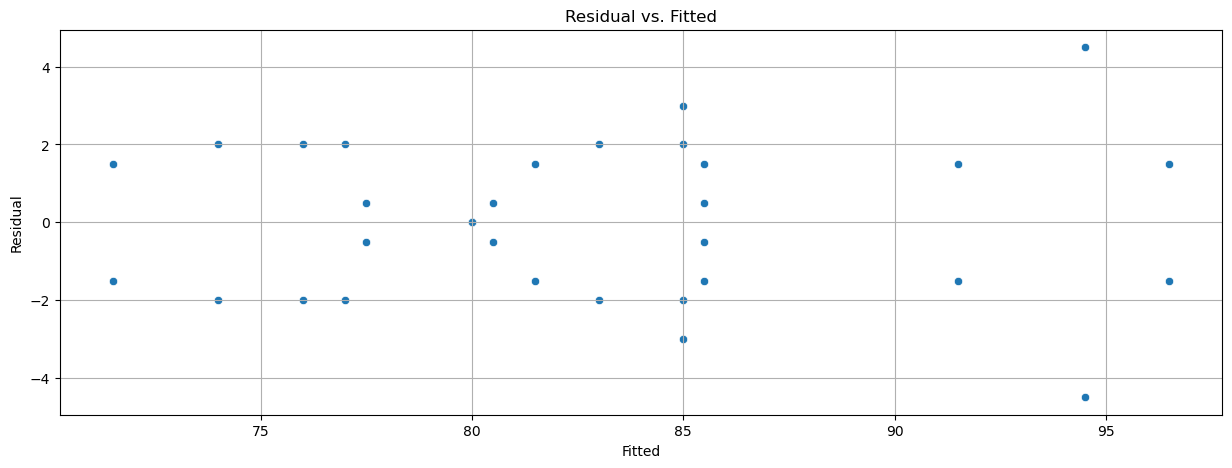

In [13]:
model_resid = pd.DataFrame({'Residual':model.resid, 'Fitted': model.fittedvalues})
plt.figure(figsize=(15,5))
sns.scatterplot(data=model_resid, x='Fitted', y='Residual')
plt.title('Residual vs. Fitted')
plt.grid()
plt.show()

__정규확률그림(QQplot)__

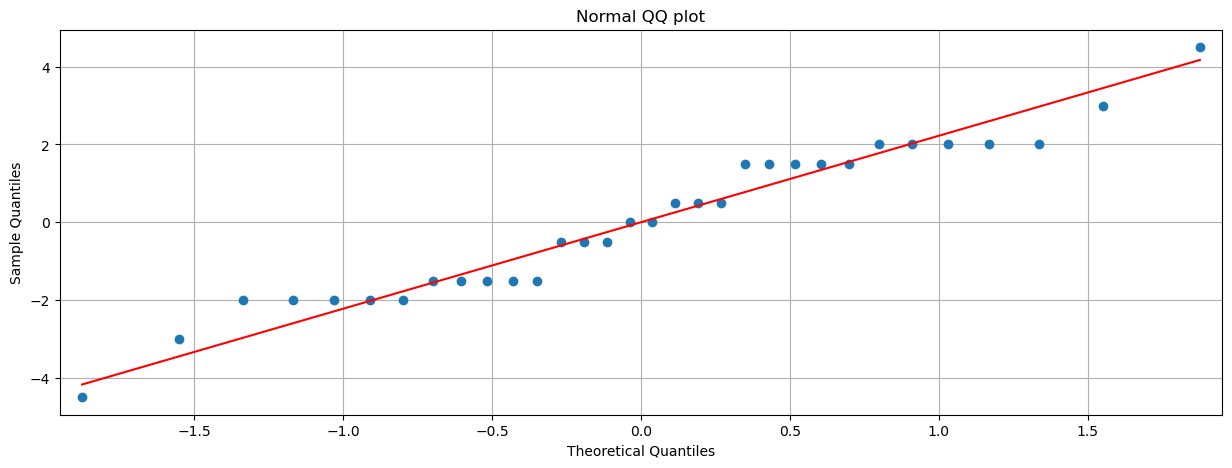

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sm.qqplot(data=model_resid['Residual'], line='q', ax=ax)
plt.title('Normal QQ plot')
plt.grid()
plt.show()